In [1]:
import pandas as pd
import torch
import torch.nn as nn

In [2]:
df = pd.read_csv('../data/fashion-mnist_test.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
class_name = {
        0 : 'T-shirt',
        1 : 'Trouser',
        2 : 'Pullover',
        3 : 'Dress',
        4 : 'Coat',
        5 : 'Sandal',
        6 : 'Shirt',
        7 : 'Sneaker',
        8 : 'Bag',
        9 : 'Ankle boot',
    }

In [25]:
import matplotlib.pyplot as plt
import numpy as np
plot_images = []
for idx in class_name.keys():
    label = df['label'] == idx
    for i , lbl in enumerate(label):
        if lbl:
            imm = df.iloc[i]
            imm = imm[1:]
            imm = np.array(imm).reshape(28, 28)
            plot_images.append(imm)
            break
 

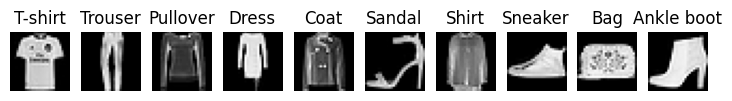

In [26]:
fig = plt.figure(figsize=(9, 9))
rows, cols = 1, 10

for i, im in enumerate(plot_images):
    fig.add_subplot(rows, cols, i+1)
    plt.imshow(im, cmap='gray')
    plt.title(class_name[i])
    plt.axis(False)

In [28]:
# Save images to data folder of all classes
from PIL import Image
import numpy as np
for i, im in enumerate(plot_images):
    img = np.array(im, dtype=np.uint8).reshape(28, 28)
    img = Image.fromarray(img)
    img.save(f"../data/{class_name[i]}.png")


In [29]:
image = df.iloc[3]
label = image[3]
image = image[1:]

In [30]:
image = torch.tensor(image, dtype=torch.float32)
image.shape

torch.Size([784])

In [33]:
image = image/255
image.max()

tensor(1.)

In [38]:
image = image.view(28, 28)

In [39]:
image = image.unsqueeze(dim=0).unsqueeze(dim=0)
image.shape

torch.Size([1, 1, 28, 28])

In [40]:
class FashionMNISTModelV1(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.block1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5, stride=1, padding=1),
            nn.ReLU()
        )
        self.block2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.block3 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=84, kernel_size=5, stride=1, padding=1),
            nn.ReLU()
        )
        self.block4 = nn.Sequential(
            nn.Conv2d(in_channels=84, out_channels=100, kernel_size=5, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.block5 = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=1600, out_features=10),
            #nn.Softmax(dim=1)
        )
       

    def forward(self, x):
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        x = self.block4(x)
        x = self.block5(x)
        return x


In [41]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = FashionMNISTModelV1().to(device)

In [42]:
model.load_state_dict(torch.load('../model/FashionMNIST_CNN.pth', map_location=torch.device(device)))

<All keys matched successfully>

In [47]:
predict = model(image.to(device))
predict

tensor([[   68.6069,  -633.6981,  -458.5685,  -343.2046,   -89.8282,  -889.2899,
         -1006.8975, -6256.4565, -2130.1248, -1745.5417]],
       grad_fn=<AddmmBackward0>)

In [96]:
soft = torch.softmax(predict.squeeze(dim=0), dim=0)
soft

tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], grad_fn=<SoftmaxBackward0>)

In [95]:
pred_label = torch.argmax(soft )
pred_label

tensor(0)

In [53]:
print(f"The predicted label is {pred_label.item()} and the original label is {label}")

The predicted label is 0 and the original label is 0
